In [1]:
import numpy as np
import pandas as pd
from ts_models import univariate_ts_rnn
import matplotlib.pyplot as plt

c:\Users\ved14\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_excel('data/AirQualityUCI.xlsx')

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [4]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
transformed_data=pca.fit_transform(df.iloc[:,2:])


In [6]:
transformed_data

array([[-529.9536936 , -229.12195761],
       [-212.50494   , -377.56720741],
       [-309.56881749, -313.87878241],
       ...,
       [-114.49751246,  303.33978943],
       [ 287.51428775,  191.54786301],
       [ 142.45726748,  220.30182033]])

<AxesSubplot:>

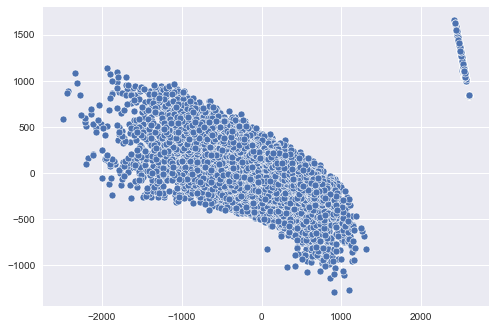

In [7]:
import seaborn as sns
sns.scatterplot(x=transformed_data[:,0],y=transformed_data[:,1])

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
tr_df=scaler.fit_transform(df.iloc[:,2:])
tr_df=pd.DataFrame(tr_df)

In [10]:
tr_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.579952,0.635966,0.538977,0.873262,0.861979,0.992715
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.541041,0.591176,0.430539,0.872036,0.857910,0.992555
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.581805,0.589748,0.467909,0.866312,0.879643,0.992678
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.596628,0.599580,0.515380,0.862633,0.900511,0.992858
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.585510,0.568067,0.481131,0.863246,0.899039,0.992868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.958471,0.676080,0.000000,0.809617,0.539043,0.400060,0.256179,0.722253,0.529160,0.708291,0.906991,0.794008,0.992710
9353,0.955168,0.608327,0.000000,0.801372,0.508285,0.329541,0.278814,0.702613,0.491933,0.539528,0.917110,0.774872,0.992488
9354,0.955168,0.599174,0.000000,0.805238,0.522991,0.293627,0.278640,0.694275,0.484286,0.474520,0.927637,0.756256,0.992136
9355,0.953752,0.536890,0.000000,0.794517,0.480737,0.258785,0.312722,0.659070,0.417143,0.356166,0.933463,0.739631,0.991509


In [11]:
features=df.columns
features=features[2:]

In [12]:
features

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [13]:
tr_df.columns=features

<AxesSubplot:ylabel='Density'>

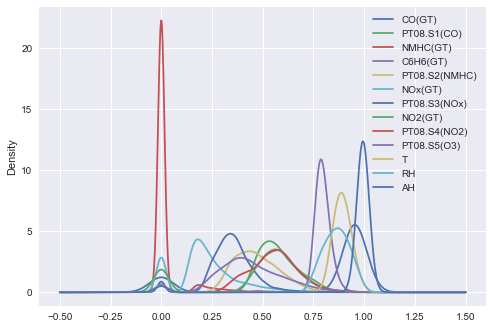

In [14]:
tr_df.plot.kde()

<AxesSubplot:>

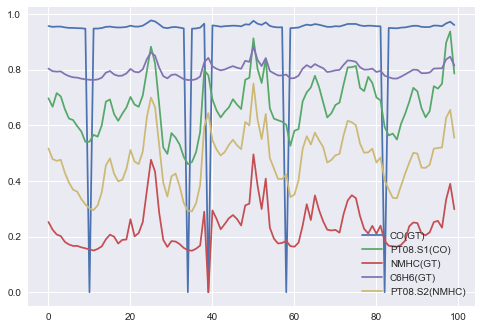

In [15]:
tr_df.iloc[:100,:5].plot()

<AxesSubplot:>

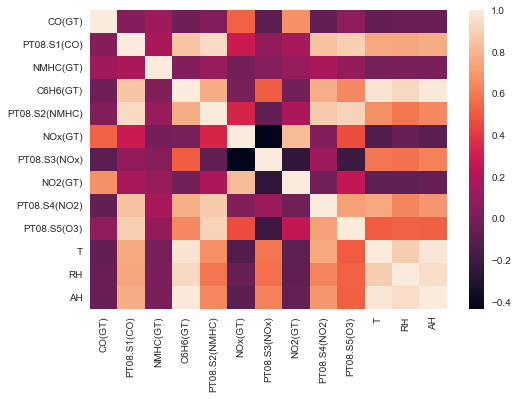

In [20]:
sns.heatmap(df.corr())

Total number of samples in the original training data =  600
Total number of samples in the generated data =  78
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 56, 50)            12800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 13)                429       
                                                                 
Total params: 35,061
Trainable params: 35,061
Non-trainable params: 0
_________________________________________________________________


c:\Users\ved14\OneDrive\Desktop\projects\Time Series analysis\resources for rnn in time series\ts_models.py:218: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/50
78/78 - 9s - loss: 0.0528 - mean_absolute_percentage_error: 11071762.0000 - val_loss: 0.0137 - val_mean_absolute_percentage_error: 7315954.0000 - 9s/epoch - 116ms/step
Epoch 2/50
78/78 - 5s - loss: 0.0160 - mean_absolute_percentage_error: 12113584.0000 - val_loss: 0.0115 - val_mean_absolute_percentage_error: 8141180.5000 - 5s/epoch - 63ms/step
Epoch 3/50
78/78 - 5s - loss: 0.0149 - mean_absolute_percentage_error: 10805904.0000 - val_loss: 0.0171 - val_mean_absolute_percentage_error: 7538138.0000 - 5s/epoch - 66ms/step
Epoch 4/50
78/78 - 6s - loss: 0.0160 - mean_absolute_percentage_error: 12023902.0000 - val_loss: 0.0118 - val_mean_absolute_percentage_error: 8901486.0000 - 6s/epoch - 72ms/step
Epoch 5/50
78/78 - 5s - loss: 0.0142 - mean_absolute_percentage_error: 12138408.0000 - val_loss: 0.0106 - val_mean_absolute_percentage_error: 8601764.0000 - 5s/epoch - 67ms/step
Epoch 6/50
78/78 - 5s - loss: 0.0133 - mean_absolute_percentage_error: 11583702.0000 - val_loss: 0.0083 - val

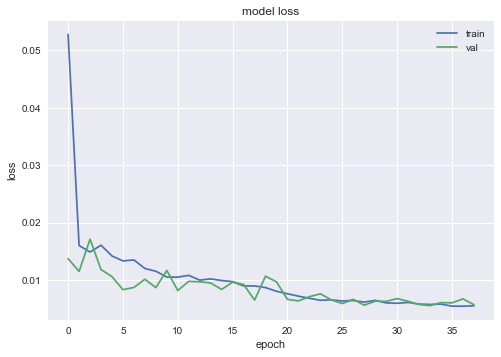

21/21 [==============================] - 1s 10ms/step


(array([[0.        , 0.65074227, 0.        , ..., 0.90801308, 0.82898952,
         0.99407896],
        [0.        , 0.72340663, 0.        , ..., 0.89881439, 0.84699974,
         0.99401564],
        [0.        , 0.69907356, 0.        , ..., 0.89339738, 0.86197939,
         0.99407267],
        ...,
        [0.9476168 , 0.49737694, 0.18430526, ..., 0.86007768, 0.89496926,
         0.99260315],
        [0.94714488, 0.48800089, 0.17854572, ..., 0.86120196, 0.89427656,
         0.99265631],
        [0.94620104, 0.46623507, 0.16342693, ..., 0.86079313, 0.90007793,
         0.9927378 ]]),
 array([[0.8710749 , 0.54708964, 0.18587157, ..., 0.84449375, 0.83946985,
         0.9904463 ],
        [0.8594214 , 0.5387345 , 0.18957958, ..., 0.8417858 , 0.8437035 ,
         0.9915447 ],
        [0.80707765, 0.5134908 , 0.19633713, ..., 0.82757324, 0.84798604,
         0.98547554],
        ...,
        [0.9035017 , 0.5523707 , 0.1936357 , ..., 0.8594599 , 0.85526365,
         1.0076324 ],
        [0.8

In [23]:
from ts_models import multivariate_ts_lstm
model=multivariate_ts_lstm()
model.train_predict(np.array(tr_df.iloc[:800,:]))

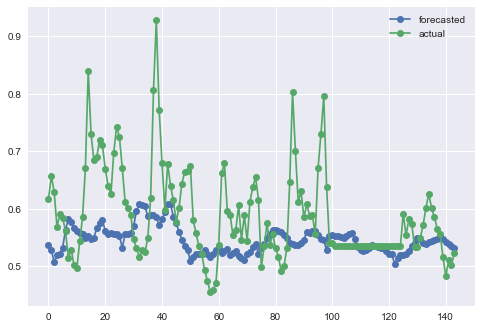

In [28]:
model.plot_predictions(8)